# Ejemplo práctico - Imagen a Texto

In [1]:
import warnings
warnings.filterwarnings("ignore")
import dotenv
import os

In [2]:


dotenv.load_dotenv()
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")

import google.generativeai as genai
from google.api_core.client_options import ClientOptions
genai.configure(
    api_key=GOOGLE_API_KEY,
    transport="rest", #  protocolo de comunicacion REST (Representational State Transfer)
    client_options=ClientOptions(
        api_endpoint=os.getenv("GOOGLE_API_BASE"),
    )
)

## Vision Function

In [3]:
import textwrap
import PIL.Image
from IPython.display import Markdown, Image
'''reemplaza los puntos (•) por asteriscos (*) para formato de lista en Markdown, 
y luego aplica un sangrado de ">" al texto, formateándolo como un bloque de cita en Markdown.'''
def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

def call_LMM(image_path: str, prompt: str, plain_text: bool=False) -> str:
    img = PIL.Image.open(image_path)
    genai.configure(api_key=GOOGLE_API_KEY)
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content([prompt, img], stream=True)
    response.resolve()
    
    if(plain_text):
        return response.text
    else:
        return to_markdown(response.text)

## Extracción de información estructurada de imagen
### Análisis del presupuesto

In [4]:
from IPython.display import Image

Image(url="factura.png")

In [5]:

call_LMM("factura.png",
    """Identifica los artículos en la factura. Asegúrate de que la salida sea en formato 
    JSON con la cantidad, descripción, precio unitario y monto.""")

> ```json
> [
>   {
>     "cantidad": 1,
>     "descripcion": "Front and rear brake cables",
>     "precio_unitario": 100.00,
>     "monto": 100.00
>   },
>   {
>     "cantidad": 2,
>     "descripcion": "New set of pedal arms",
>     "precio_unitario": 15.00,
>     "monto": 30.00
>   },
>   {
>     "cantidad": 3,
>     "descripcion": "Labor 3hrs",
>     "precio_unitario": 5.00,
>     "monto": 15.00
>   }
> ]
> ```

In [7]:
call_LMM("factura.png",
    """¿Cuánto costarían cuatro juegos de brazos de pedal y 6 horas de mano de obra?""",
    plain_text=True
)

'Aquí está el desglose de costos para cuatro juegos de brazos de pedal y 6 horas de mano de obra, basándose en la factura proporcionada:\n\n* **Brazos de pedal:** Un juego de brazos de pedal cuesta $15.00. Cuatro juegos costarían 4 * $15.00 = $60.00\n* **Mano de obra:** Tres horas de mano de obra cuestan $15.00 (5.00$/hora). Seis horas de mano de obra costarían (6 horas / 3 horas) * $15.00 = $30.00\n\n**Total:** El costo total de cuatro juegos de brazos de pedal y seis horas de mano de obra sería de $60.00 + $30.00 = $90.00.'

### Extracción de tablas de imagenes

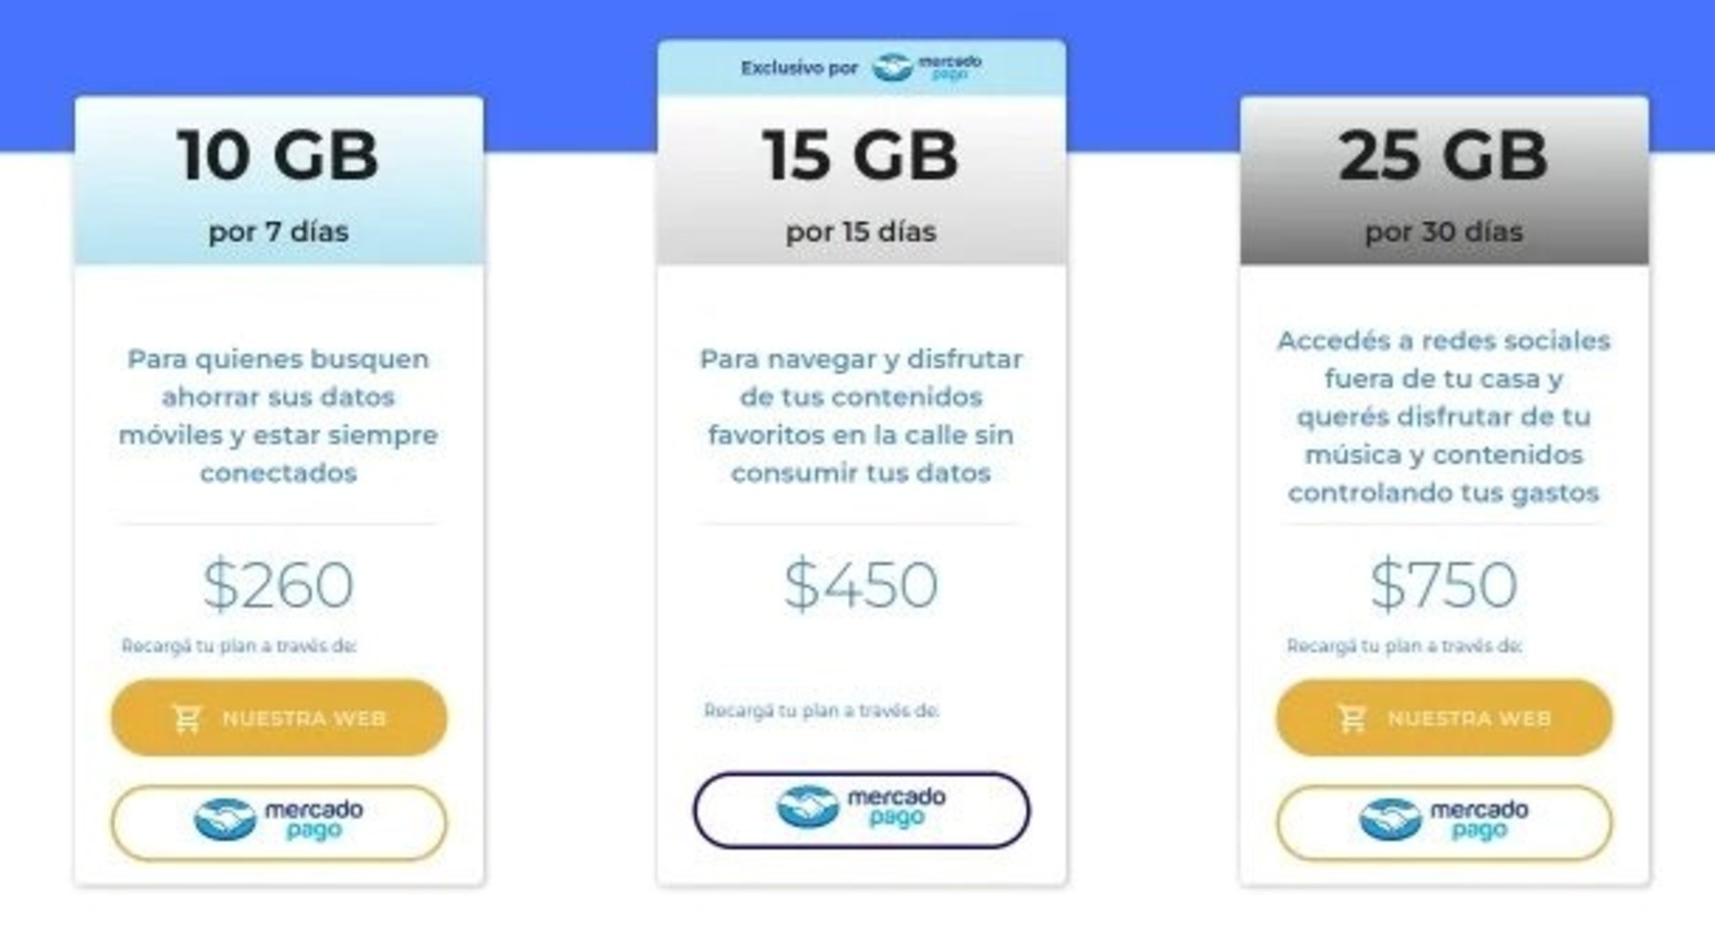

In [8]:
Image("telecentro.png")

In [9]:
call_LMM("telecentro.png", 
    "Imprime el contenido de la imagen como una tabla en markdown.")

> Aquí tienes la tabla en formato Markdown que representa la información de la imagen:
> 
> | Plan de datos | Duración | Descripción | Precio | Método de recarga |
> |---|---|---|---|---|
> | 10 GB | 7 días | Para quienes buscan ahorrar datos móviles y estar siempre conectados | $260 | Nuestra web |
> | 15 GB | 15 días | Para navegar y disfrutar de tus contenidos favoritos en la calle sin consumir tus datos | $450 | Nuestra web |
> | 25 GB | 30 días | Accede a redes sociales fuera de tu casa y disfruta de tu música y contenidos controlando tus gastos | $750 | Nuestra web |
> 
> Todos los precios están en pesos.  El método de pago es Mercado Pago.


In [10]:
call_LMM("telecentro.png", 
    """Analiza el contenido de la imagen como una tabla en markdown. Cuál es el plan
    que tiene el precio mas bajo por GB?""")

> Aquí tienes una tabla markdown que analiza el contenido de la imagen:
> 
> | Plan de Datos | Duración | Precio | Precio por GB | Descripción |
> |---|---|---|---|---|
> | 10 GB | 7 días | $260 | $26/GB | Para quienes buscan ahorrar datos móviles y estar siempre conectados |
> | 15 GB | 15 días | $450 | $30/GB | Para navegar y disfrutar de tus contenidos favoritos en la calle sin consumir tus datos |
> | 25 GB | 30 días | $750 | $30/GB | Acceder a redes sociales fuera de casa y disfrutar de música y contenidos controlando tus gastos |
> 
> **El plan con el precio más bajo por GB es el de 10 GB por $260.**  A pesar de que el precio por GB del plan de 15GB y 25GB es el mismo, $30/GB, el plan de 10 GB ofrece un precio de $26/GB, lo que lo convierte en la opción más económica por GB.


### Análisis de  Flow Charts

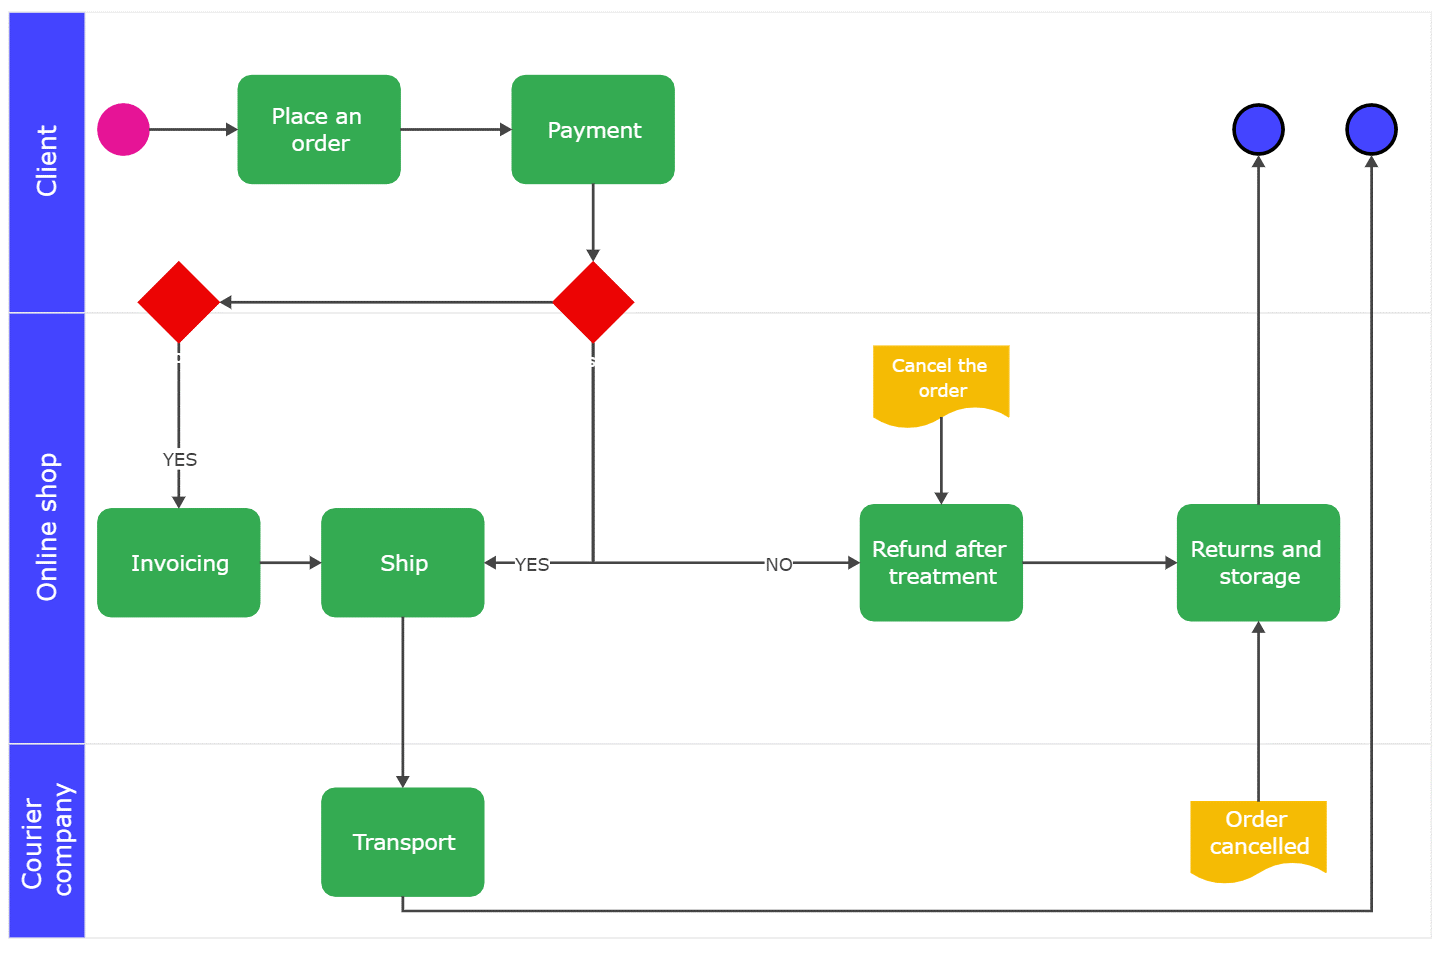

In [11]:
Image("diagrama.png")

In [ ]:
call_LMM("diagrama.png", 
    """Proporciona un desglose resumido del diagrama de flujo en la imagen en formato de lista numerada. 
    En español""")

In [ ]:
call_LMM("diagrama.png", 
    """Analiza el diagrama de flujo en la imagen, luego genera un
      código en Python que implemente este flujo lógico en una función""")